# Before your start:
- Read the README.md file
- Happy learning!

In [48]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [49]:
# loading the data: Retail Sales data

sales = pd.read_csv('REAL_DATA.csv')


In [50]:
# quick preview
print(sales.head())

print("\nshape:")
print(sales.shape)

print("\nDescribe:")
print(sales.describe)
      

    index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  272371       415            7  01/03/2015                    0     0   
1  558468        27            7  29/12/2013                    0     0   
2   76950       404            3  19/03/2014                  657     1   
3   77556       683            2  29/01/2013                  862     1   
4  456344       920            3  19/03/2014                  591     1   

   promotion state_holiday  school_holiday  
0          0             0               0  
1          0             0               0  
2          1             0               0  
3          0             0               0  
4          1             0               0  

shape:
(71205, 9)

Describe:
<bound method NDFrame.describe of         index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      272371       415            7  01/03/2015                    0     0   
1      558468        27            7  29/12/2013         

In [52]:
print("\nDatatypes:")
print(sales.dtypes)

#print("\nColumns:")
print(sales.columns)

#there are no missing data
print("\nMissing data:")
print(sales.isnull().sum())

#Drop the first column as this seems to be from Indexing and doesn't make sense
sales = sales.drop(columns=["index"])
#print(sales.dtypes)



Datatypes:
index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object
Index(['index', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')

Missing data:
index                  0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
dtype: int64


In [39]:
#there are 2 catagorical data to manage. date & state_holiday.
print(sales.dtypes)

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object


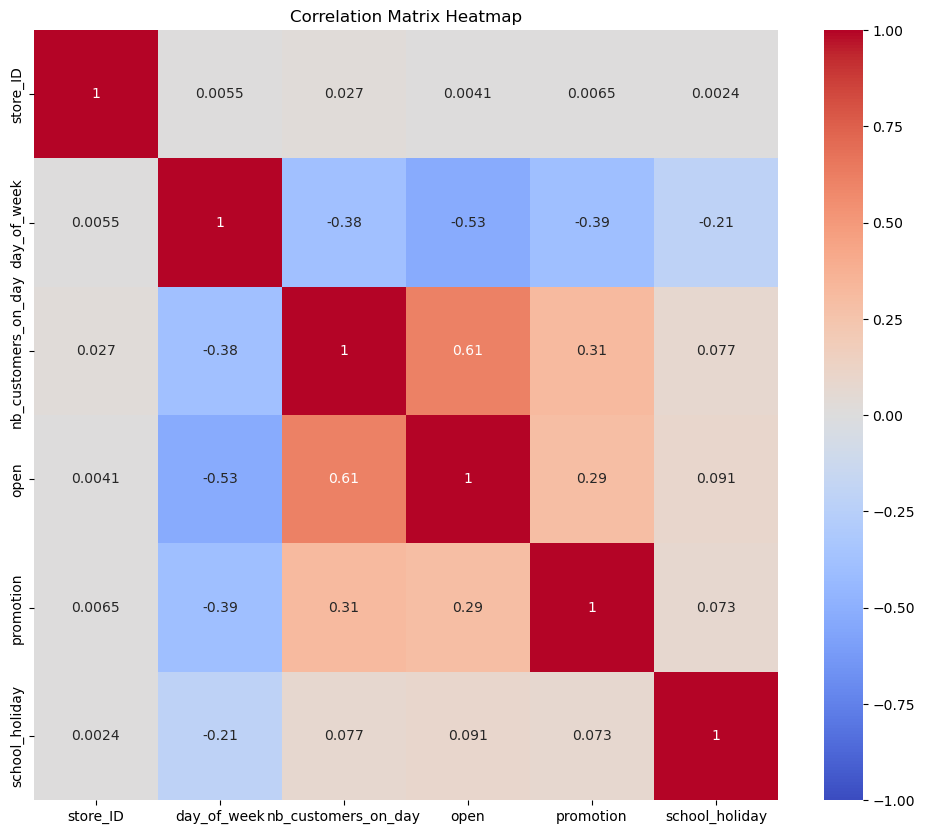

In [53]:
# Create the correlation matrix

numeric_columns = sales.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()
#print(correlation_matrix)

#Create the Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [54]:
! pip install xgboost

In [42]:
# Perform Feature performance analysis using "XGBoost regressor".

import xgboost # Import XGBoost

#Preparing the training set X,y -> 
X = sales._get_numeric_data().drop('sales', axis=1)
y = sales['sales']

In [43]:
xgb = xgboost.XGBRegressor()  # Initialize the XGBoost Regressor
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
sort_idx = xgb.feature_importances_.argsort()   #feature importance sort

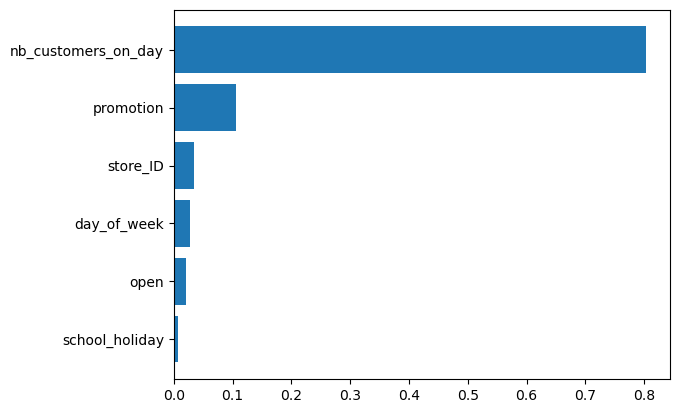

In [45]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])    #plotting feature importance
plt.show();

In [46]:
# NOT NEEDED as THE FEATURE PERFORMANCE IS DONE BY XGBoost regressor above. This one is by "RandomForestRegressor"

#from sklearn.ensemble import RandomForestRegressor
#import matplotlib.pyplot as plt
#import numpy as np

#print(X)
#print(y)

# Fit the Random Forest model
#rf = RandomForestRegressor(n_estimators=10)
#rf.fit(X, y)

# Get feature importances
#importances = rf.feature_importances_

# Get the feature names (assuming X is a DataFrame)
#feature_names = X.columns

# Create a sorted list of indices based on importance
#indices = np.argsort(importances)[::-1]

# Plotting
#plt.figure(figsize=(10, 6))
#plt.title('Feature Importances')
#plt.bar(range(X.shape[1]), importances[indices], align='center')
#plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
#plt.xlim([-1, X.shape[1]])
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.show()


In [47]:
# DATA TRANSFORMATION STEPS:

# Step 1 Missing value problem 
# Step 2 remove features that are not of high importance
# Step 3 Convert catagorical data - managed below

# Step 1 Missing value problem - Have NONE

In [55]:
# Step 2 remove features that are not of high importance

#removing features that have little to no impact on the target variable can help improve the model's performance. 

# open and school_holiday are not contributing significantly, but I know that Open is directly influencing the Sales. I am going to drop these from my model.

sales = sales.drop(columns=["school_holiday"])
print(sales.dtypes)
print(sales.shape)

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
dtype: object
(71205, 7)


In [56]:
# Step 3 - Convert Catagorical data into Integers (OneHot Encoding)

import pandas as pd

# state_holiday is an object contains value of 0,a,b,c # Need to do one-hot encoding on this field. 
sales = pd.get_dummies(sales, columns=['state_holiday'], drop_first=True)

#convert date to a datetime and then to Numerical value.
sales['date'] = pd.to_datetime(sales['date'])

#Extract features from the date
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day

# Drop the original date column 
sales = sales.drop('date', axis=1)

print(sales.dtypes)

ValueError: time data "29/12/2013" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [28]:
# DATA PRE-PROCESSING STEPS:


# Standardization using StandardScaler - Feature Scaling!!! to standardize diff ranges of features

from sklearn.preprocessing import StandardScaler

# Split the input between features and target and apply Scaling to the features

#X = sales.drop('sales', axis=1)
#y = sales['sales']

#X_scaled = StandardScaler().fit_transform(X)
X_scaled = StandardScaler().fit_transform(sales)
X_scaled


array([[-5.97155402e-01, -9.45739742e-05, -2.50808163e-01, ...,
        -1.07077675e+00, -5.55154562e-01,  2.60296337e-01],
       [-5.10165994e-01,  1.00167048e+00,  1.30580047e-01, ...,
         1.50211948e+00, -5.55154562e-01, -5.35956722e-01],
       [ 7.72927767e-01, -9.45739742e-05,  7.25287085e-01, ...,
        -1.07077675e+00,  6.47419324e-01,  1.51155114e+00],
       ...,
       [ 1.33214539e+00, -1.50274215e+00,  6.28323981e-01, ...,
         2.15671368e-01,  3.46775852e-01, -9.90958470e-01],
       [ 1.63350155e+00, -9.45739742e-05,  1.97376852e-01, ...,
         2.15671368e-01,  4.61323811e-02, -4.22206285e-01],
       [ 4.24970137e-01,  1.50255300e+00, -1.36480649e+00, ...,
         1.50211948e+00, -2.54511090e-01, -1.44596022e+00]])

In [30]:
# NOT NEEDED NOW! PREVIOUS STEP TAKES CARE OF THIS SCALING !!!


# Feature Scaling due to wide range of values of Features!

#from sklearn.preprocessing import StandardScaler


# For Scaling the data need to separate Numeric and non-numeric features.

# Separate columns
#numeric_columns = sales.select_dtypes(include=['int64', 'float64']).columns
#non_numeric_columns = sales.select_dtypes(exclude=['int64', 'float64']).columns

# Separate data
#numeric_data = sales[numeric_columns]
#non_numeric_data = sales[non_numeric_columns]

# Initialize the scaler
#scaler = StandardScaler()

# Fit and transform the numeric data
#scaled_numeric_data = scaler.fit_transform(numeric_data)

# Convert the scaled data back to a DataFrame
#scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns, index=sales.index)

# Concatenate scaled numeric data with non-numeric data
#scaled_sales = pd.concat([scaled_numeric_df, non_numeric_data], axis=1)

X_scaled.shape

(640840, 11)

In [31]:
# AI MODEL 1: XGBoost. 

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Assuming you have your features in X and target in y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

R² Score: 0.9340294445221669


In [32]:
# Perform Cross validation on the model to know it generalizes well and with small standard deviation, it indicates consistent performance
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# Initialize the XGBoost Regressor with the same parameters used before
xgb_reg = XGBRegressor(
    n_estimators=100,    # number of boosting rounds
    learning_rate=0.1,   # step size shrinkage
    max_depth=6,         # maximum depth of trees
    subsample=0.8,       # fraction of samples to be used for fitting the trees
    colsample_bytree=0.8 # fraction of features to be used for fitting the trees
)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')

# Calculate mean and standard deviation of R² scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average R² Score: {mean_cv_score:.4f}')
print(f'Standard Deviation of R² Score: {std_cv_score:.4f}')

Cross-Validation R² Scores: [0.9143569  0.91692061 0.913809   0.91379196 0.91471359]
Average R² Score: 0.9147
Standard Deviation of R² Score: 0.0012


In [33]:
# MODEL 2: RandomForest model with K-fold validation.

from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt')


kf = KFold(n_splits=5, shuffle=True, random_state=42)  # I can adjust n_splits based on needs (keeping it to 3 so it can run faster)

r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # This is scaled numpy array
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]     # This is DF 
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
   #mse_scores.append(mean_squared_error(y_test, y_pred))
    
print(f"R2 Scores: {r2_scores}")
#print(f"Mean Squared Error Scores: {mse_scores}")
print(f"Average R2 Score: {sum(r2_scores)/len(r2_scores)}")
#print(f"Average Mean Squared Error: {sum(mse_scores)/len(mse_scores)}")

R2 Scores: [0.8731888299263726, 0.8751140132479195, 0.8746486893680612, 0.8733014477324819, 0.8749256520928966]
Average R2 Score: 0.8742357264735462


In [112]:
# Cross check with LightGBM model

!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 550.5 kB/s eta 0:00:03
   --------- ------------------------------ 0.3/1.4 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.8 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00


In [34]:
# MODEL 3 - LightGBM Model

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your features in X and target in y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',  # root mean squared error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum tree leaves for base learners
    'learning_rate': 0.05,
    'feature_fraction': 0.9,  # Use 90% of features for training
}

# Train the model without early stopping
num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data])

# Make predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 512672, number of used features: 11
[LightGBM] [Info] Start training from score 5779.022991
R² Score: 0.9029287152739371
